<a href="https://colab.research.google.com/github/Nick18899/ProjectDeepLearning/blob/main/ManyDatasetsConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
!pip3 uninstall keras-nightly
!pip3 install gensim
!pip3 uninstall -y tensorflow
!pip3 install keras==2.3.1
!pip install ekphrasis torch transformers emoji swifter
!pip install ekphrasis sentence-transformers
!pip install -U bert-serving-server  # server
!pip install -U bert-serving-client 
!pip install tensorflow==1.15.0
!pip3 install h5py==2.10.0
!pip install git+https://github.com/erikavaris/tokenizer.git
!pip install stop-words
!pip install pandas
!rm ./tweets.csv* # Удалить дубликаты и старые версии файла на всякий случай
#!cat './celebr.csv' | head -n 10
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('word_tokenize')

Found existing installation: tensorflow 1.15.2
Uninstalling tensorflow-1.15.2:
  Successfully uninstalled tensorflow-1.15.2
  Cloning https://github.com/erikavaris/tokenizer.git to /tmp/pip-req-build-941orjd6
  Running command git clone -q https://github.com/erikavaris/tokenizer.git /tmp/pip-req-build-941orjd6
rm: cannot remove './tweets.csv*': No such file or directory
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


False

In [ ]:
%tensorflow_version 1.x
!pip install -U torchviz
!pip install ekphrasis torch transformers emoji swifter
#import torch
from transformers import AutoModel, AutoTokenizer 
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MultiLabelBinarizer
!pip install ekphrasis sentence-transformers
!pip install -U bert-serving-server  # server
!pip install -U bert-serving-client  # client, independent of `bert-serving-server`
from torch import nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
import emoji
from google.colab import drive
from collections import Counter
import os
import matplotlib.pyplot as plt
import pandas as pd
import swifter
from bert_serving.client import BertClient
from nltk.tokenize import TweetTokenizer
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip -o uncased_L-12_H-768_A-12.zip
!nohup bert-serving-start -model_dir=./uncased_L-12_H-768_A-12 -num_worker=4 > out.file 2>&1 & 
bertClient = BertClient(check_length=False)

--2021-12-14 13:34:57--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 108.177.11.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip.2’

uncased_L-12_H-768_ 100%[===================>] 388.84M  62.9MB/s    in 6.7s    

2021-12-14 13:35:04 (57.6 MB/s) - ‘uncased_L-12_H-768_A-12.zip.2’ saved [407727028/407727028]

Archive:  uncased_L-12_H-768_A-12.zip
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [ ]:
from google.colab import drive
from collections import Counter
import pandas as pd
import numpy as np
import keras
from tokenizer import tokenizer
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from stop_words import get_stop_words
import nltk
import os
from nltk.corpus import stopwords
from tokenizer import tokenizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Embedding, Conv1D, GlobalMaxPool1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard  
from keras.callbacks import EarlyStopping
import tensorflow as tf
import keras, keras.layers as L
from google.colab import drive
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Embedding, Conv1D, GlobalMaxPool1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import Phrases
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Embedding, Conv1D, GlobalMaxPool1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard  
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pickle
from keras.utils import plot_model
from keras.callbacks import TensorBoard  
from keras.callbacks import EarlyStopping
import keras.callbacks
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K

!pip install -q kaggle

In [ ]:
def _download_recourses():
  drive.mount('/content/gdrive')
  os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive"
  %cd /content/gdrive/My Drive/Kaggle
  !rm *.csv *.zip
  #!yes | kaggle datasets download -d manchunhui/us-election-2020-tweets
  #!unzip -o us-election-2020-tweets.zip
  #!yes | kaggle datasets download -d wjia26/epl-teams-twitter-sentiment-dataset
  #!unzip -o epl-teams-twitter-sentiment-dataset.zip 
  #!yes | kaggle datasets download -d alaix14/bitcoin-tweets-20160101-to-20190329
  #!unzip -o bitcoin-tweets-20160101-to-20190329.zip
  #!yes | kaggle datasets download -d yazanshannak/us-covid-tweets
  #!unzip -o us-covid-tweets.zip
  #!yes | kaggle datasets download -d monogenea/game-of-thrones-twitter
  #!unzip -o game-of-thrones-twitter.zip
  #!yes | kaggle datasets download -d aellatif/covid19
  #!unzip -o covid19.zip
  !yes | kaggle datasets download -d nick1899/new-twitter-data
  !unzip -o new-twitter-data.zip
  #!yes | kaggle datasets download -d rgupta09/world-cup-2018-tweets
  #!unzip -o world-cup-2018-tweets.zip
  #!cat hashtag_donaldtrump.csv | tail -n 10

In [ ]:
def _new_data_load_from_files():
  #unparsed_data = pd.read_csv('./all.csv', lineterminator='\n',
  #                              usecols=[' full_text', ' user_name', ' likes'])
  #unparsed_data.rename(columns = {' full_text':'tweet'}, inplace=True)
  #data = unparsed_data.iloc[[index for index, value in unparsed_data.tweet.str.contains('#').iteritems() if value]].reset_index(drop=True).sample(n=3000000, random_state=1)
  #data = data.reset_index(drop=True)
  data1_unparsed = pd.read_csv('./datum2.csv', lineterminator='\n',
                                usecols=['full_text', 'likes', 'user_name'])
  '''data1_unparsed = pd.read_csv('./bigboy.csv', lineterminator='\n',
                                usecols=['full_text', 'user_name', 'likes'])'''
  data1_unparsed.rename(columns = {'full_text':'tweet'}, inplace=True)
  data1 = data1_unparsed.iloc[[index for index, value in data1_unparsed.tweet.str.contains('#').iteritems() if value]].reset_index(drop=True).sample(n=4000000, random_state=1)
  #1 -- 3400000; 2 -- 4000000; 3 --
  data1.rename(columns={'likes': 'number_of_likes', 'tweet':'content', 'user_name':'author'},inplace=True)
  #data.rename(columns={' likes': 'number_of_likes', 'tweet':'content', ' user_name':'author'},inplace=True)
  #data = data.reset_index(drop=True)
  data1 = data1.reset_index(drop=True)
  #data = data.append(data1, ignore_index=True)
  #data = data.reset_index(drop=True)
  return data1

In [ ]:
def _bulk_load_from_files():
    trump_unparsed_data = pd.read_csv('./hashtag_donaldtrump.csv', lineterminator='\n',
                                usecols=['likes', 'retweet_count', 'user_followers_count', 'tweet', 'user_name'])
    biden_unparsed_data = pd.read_csv('./hashtag_joebiden.csv', lineterminator='\n',
                                usecols=['likes', 'retweet_count', 'user_followers_count', 'tweet', 'user_name'])
    football = pd.read_csv('./2020-07-09 till 2020-09-19.csv', lineterminator='\n',
                                usecols=['username', 'retweet_count', 'text', 'search_query'])
    football2 = pd.read_csv('./2020-09-20 till 2020-10-13.csv', lineterminator='\n',
                                usecols=['username', 'retweet_count', 'text', 'search_query'])
    bitcoin = pd.read_csv('tweets.csv', lineterminator='\n', delimiter=';', skiprows=0,
                                usecols=['user', 'text\r', 'likes'])
    GoT = pd.read_csv('gotTwitter.csv', lineterminator='\n',
                                usecols=['screen_name', 'text', 'display_text_width'])
    Fifa = pd.read_csv('FIFA.csv', lineterminator='\n',
                                usecols=['len', 'Orig_Tweet', 'RTs'])
    covid_11 = pd.read_csv('covid-19_tw.csv', lineterminator='\n',
                                usecols=['Tweet ID', 'Tweet', 'Favorited'])
    covid_12 = pd.read_csv('db_tw.csv', lineterminator='\n',
                                    usecols=['Tweet ID', 'Tweet', 'Favorited'])
    covid_11 = covid_11.append(covid_12)
    covid_11.rename(columns={'Favorited':'likes', 'Tweet ID':'user_name', 'Tweet': 'tweet'},inplace=True)
    covid_11 = covid_11.sort_values(by = 'likes',  ascending=False)
    covid_11 = covid_11.reset_index(drop=True)
    covid_11 = covid_11.iloc[[index for index, value in covid_11.tweet.str.contains('#').iteritems() if value]].reset_index(drop=True).sample(n=800000, random_state=1)
    Fifa.rename(columns={'RTs':'likes', 'len':'user_name', 'Orig_Tweet': 'tweet'},inplace=True)
    Fifa = Fifa.iloc[[index for index, value in Fifa.tweet.str.contains('#').iteritems() if value]].reset_index(drop=True).sample(n=200000, random_state=1)
    GoT.rename(columns={'display_text_width':'likes', 'screen_name':'user_name', 'text': 'tweet'},inplace=True)
    GoT = GoT.iloc[[index for index, value in GoT.tweet.str.contains('#').iteritems() if value]].reset_index(drop=True).sample(n=100000, random_state=1)
    bitcoin.rename(columns={'text':'tweet', 'user':'user_name', 'text\r': 'tweet'},inplace=True)
    bitcoin = bitcoin.sort_values(by = 'likes',  ascending=False)
    bitcoin = bitcoin[:1000000]
    bitcoin = bitcoin.reset_index(drop=True)
    bitcoin = bitcoin.iloc[[index for index, value in bitcoin.tweet.str.contains('#').iteritems() if value]].reset_index(drop=True).sample(n=200000, random_state=1)
    football.append(football2)
    football.reset_index(drop=True)
    unparsed_data = trump_unparsed_data.append(biden_unparsed_data)
    unparsed_data.drop(columns = ['user_followers_count', 'retweet_count'],inplace=True, axis=1)
    football.rename(columns={'retweet_count': 'likes', 'text':'tweet', 'username':'user_name'},inplace=True)
    football['search_query'] = football['search_query'].apply(lambda x: x.split(' OR '))
    football = football.iloc[[index for index, value in football.tweet.str.contains('#').iteritems() if value]].reset_index(drop=True).sample(n=200000, random_state=1)
    football.rename(columns={'likes': 'number_of_likes', 'tweet':'content', 'user_name':'author'},inplace=True)
    data = unparsed_data.iloc[[index for index, value in unparsed_data.tweet.str.contains('#').iteritems() if value]].reset_index(drop=True).sample(n=400000, random_state=1)
    data = data.append(bitcoin)
    data = data.append(GoT)
    data = data.append(Fifa)
    data = data.append(covid_11)
    data = data.reset_index(drop=True)
    data.rename(columns={'likes': 'number_of_likes', 'tweet':'content', 'user_name':'author'},inplace=True)
    #data.drop(columns = 'user_followers_count',inplace=True, axis=1) #потом переписать, удалив celebreties
    return data, football
    


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", normalization=True, use_fast=False)

In [ ]:
def _extract_tags(tweets: pd.Series):
  return tweets.apply(lambda lstOfTokens: [token for token in lstOfTokens if token.startswith('#')])

def _tokenize(row_tweets: pd.Series):
  print("---TOKENIZING TWEETS NOW---")
  text_processor = TextPreProcessor(
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    annotate={"hashtag",# "allcaps", 
              "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    segmenter="twitter", 
    corrector="twitter", 
    #unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    dicts=[emoticons]
  )
  return row_tweets.apply(text_processor.pre_process_doc)

In [ ]:
_download_recourses()
!wget 'https://raw.githubusercontent.com/Nick18899/Dataset/main/celebr.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle
100% 2.37G/2.37G [00:23<00:00, 137MB/s]
100% 2.37G/2.37G [00:23<00:00, 108MB/s]
Archive:  new-twitter-data.zip
  inflating: bigboy.csv              
  inflating: datum1.csv              
  inflating: datum2.csv              
  inflating: datum3.csv              
  inflating: test.csv                
--2021-12-14 13:37:32--  https://raw.githubusercontent.com/Nick18899/Dataset/main/celebr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7881958 (7.5M) [text/plain]
Saving to: ‘celebr.csv’

celebr.csv          100%[===================>]   7.52M  --.-KB/s    in 0.1s    

2021-12-14 13:37:32 (51.8 MB/

# Парсинг датасета и запихивание его в dataframe

# Добавление других датасетов

In [ ]:
#new_dataset, football = _bulk_load_from_files()
data = _new_data_load_from_files()
data = data.reset_index(drop=True)
#print(new_dataset)

In [ ]:
def _filter_bad_tweets(data: pd.DataFrame):
  data = data[data['content'].apply(lambda tweet: 10 < len(tweet) < 1000000)].reset_index(drop=True)
  data = data[data['tags'].apply(lambda lst: 5 > len(lst) > 0)].reset_index(drop=True)
  return data

In [ ]:
def summing_of_tags(football: pd.DataFrame):
  for i in range (0, football['tags'].size):
    football['tags'].iloc[i].extend(football['search_query'].iloc[i])
  return football

# Предподготовка текстов твитов для последующей векторизации, разбиение текстов на токены при помощи токенайзера

https://github.com/cbaziotis/ekphrasis -- используемый токенайзер

In [ ]:
%cd /root
!yes | kaggle datasets download -d nick1899/ekphrasis-stats
!jar -xvf ekphrasis-stats.zip
%cd /content

/root
100% 203M/203M [00:01<00:00, 127MB/s]
100% 203M/203M [00:01<00:00, 117MB/s]
 inflated: .ekphrasis/stats/english/counts_1grams.txt
 inflated: .ekphrasis/stats/english/counts_2grams.txt
 inflated: .ekphrasis/stats/twitter/counts_1grams.json
 inflated: .ekphrasis/stats/twitter/counts_1grams.pickle
 inflated: .ekphrasis/stats/twitter/counts_1grams.txt
 inflated: .ekphrasis/stats/twitter/counts_2grams.json
 inflated: .ekphrasis/stats/twitter/counts_2grams.txt
 inflated: .ekphrasis/stats/twitter_2018/counts_1grams.txt
 inflated: .ekphrasis/stats/twitter_2018/counts_2grams.txt
/content


In [ ]:
data.head()

,content,author,number_of_likes
0,@jmonlyjm Uhhhhhhh baby chickie minie😚\nWE MIS...,KINGPJM1310,2
1,"@BiggBoss If people talk behind your back, it...",Saif68394021,0
2,Congrats to @PhD_GSA graduate Eman Mayah &amp;...,PhD_GSA,2
3,No word can explain the vibrant crowd at Kasar...,geffmomanyi,1
4,Among the greatest reasons for the high status...,MianSad63622281,0


In [ ]:
data['content'] = _tokenize(data['content'])
#football['content'] = _tokenize(football['content'])
data['tags'] = _extract_tags(data['content'])
#football['tags'] = _extract_tags(football['content'])
#football = summing_of_tags(football)
#football.head()


---TOKENIZING TWEETS NOW---
Reading twitter - 1grams ...


In [ ]:
#football.reset_index(drop=True)
#football1 = football
#data.drop(columns = 'number_of_shares', inplace=True, axis=1)

In [ ]:
#football.columns.to_list()

In [ ]:
#football = football.drop(columns = 'search_query', inplace=True, axis=1)

In [ ]:
#cols = data.columns.to_list()
#football1 = football1[cols]

In [ ]:
#data = data.append(football1,ignore_index=True)
#data = data.reset_index(drop=True)

In [ ]:
#football1 = football1.iloc[0:0]

In [ ]:
data.shape

(4000000, 4)

In [ ]:
data.head()

,content,author,number_of_likes,tags
0,"[<user>, uh, <elongated>, baby, chickie, minie...",KINGPJM1310,2,"[#jiminie, #jiminwrap2021, #parkjimin]"
1,"[<user>, if, people, talk, behind, your, back,...",Saif68394021,0,"[#bbkingkaran, #karankundrra, #bb15]"
2,"[congrats, to, <user>, graduate, eman, mayah, ...",PhD_GSA,2,[#etpac21]
3,"[no, word, can, explain, the, vibrant, crowd, ...",geffmomanyi,1,[#azimiolaumoja]
4,"[among, the, greatest, reasons, for, the, high...",MianSad63622281,0,[#امام_اہلسنت_کانفرس_خیرپور]


In [ ]:
#T = tokenizer.TweetTokenizer(preserve_case=False, preserve_handles=False, preserve_hashes=True, regularize=True, preserve_len=False, preserve_emoji=True, preserve_url=False)
stop_words = list(get_stop_words('en'))
nltk_words = list(set(stopwords.words('english')))
data = _filter_bad_tweets(data)

# Скачивание эмбеддингов

In [ ]:
#import gensim.downloader
#EMBEDDINGS_DIMENSIONS = 100 #размерность векторов
#glove_vectors = gensim.downloader.load('glove-twitter-' + str(EMBEDDINGS_DIMENSIONS)) ## Импорт эмбеддингов при помощи оберкти gensim
# Допустимые размерности векторов: 25, 50, 100, 200
# Чтобы посмотреть список эмбеддингов: gensim.downloader.info(name_only=True)
data.shape

(2719004, 4)

In [ ]:
#data = data1

# Удаление стоп-слов, знаков препинания и слов, отсутствующих в словаре

---




In [ ]:
def filtering (data: pd.DataFrame):
  #data = data.apply(lambda separatedTweet: list(filter(lambda token: not ('#' in token), separatedTweet)))
  filters=['!','"','$','%','&','(',')','*','+',',','-','.','/',':',';','<','=','>','?','[','\\',']','^','_','`','{','|','}','~','\t','\n']
  #filters=['!','"','@','#','$','%','&','(',')','*','+',',','-','.','/',':',';','<','=','>','?','[','\\',']','^','_','`','{','|','}','~','\t','\n']

  data = data.apply(lambda tweet: list(filter(lambda word: not (word in filters), tweet))) #убираем знаки препинания
  return data

data['content'] = filtering(data['content'])
#data['content'] = data['content'].apply(lambda tweet: list(filter(lambda word: word in glove_vectors.vocab.keys(), tweet))) #убираем левые слова
#data['content'] = data['content'].apply(lambda tweet: list(filter(lambda word: not (word in nltk_words), tweet))) #убираем стоп-слова

In [ ]:
%cd /content/gdrive/My Drive/Models_alpha_version

/content/gdrive/My Drive/Models_alpha_version


In [ ]:
from pathlib import Path

my_file = Path("./word2vec.model")
if my_file.is_file():
  model = Word2Vec.load("word2vec.model")
  #model.train(data['content'], total_examples=model.corpus_count, epochs=model.epochs)
else:
  model = Word2Vec(data['content'], min_count=70)
  #model = Word2Vec(min_count=70)

In [ ]:
with open('company_data.pkl', 'rb') as k:
    mdb = pickle.load(k)

In [ ]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        self.epoch += 1

In [ ]:
#model.build_vocab(data['content'], update = True)
#model.train(data['content'], total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
#model1 = Word2Vec.load("word2vec.model")
words = list(model.wv.vocab)
len(words)
#46792

46792

In [ ]:
'''model1 = Word2Vec([["cat", "say", "meow"], ["dog", "say", "woof"]], min_count=1)
model1.build_vocab([['potoatoes', 'and', 'farmers']], update=True)
model1.train([['potoatoes', 'and', 'farmers']], total_examples=model1.corpus_count, epochs=model1.epochs)
model1['cat']'''

'model1 = Word2Vec([["cat", "say", "meow"], ["dog", "say", "woof"]], min_count=1)\nmodel1.build_vocab([[\'potoatoes\', \'and\', \'farmers\']], update=True)\nmodel1.train([[\'potoatoes\', \'and\', \'farmers\']], total_examples=model1.corpus_count, epochs=model1.epochs)\nmodel1[\'cat\']'

In [ ]:
with open('cluster_data.pkl', 'rb') as f:
    dict_of_vectors = pickle.load(f)

In [ ]:
#model.save("word2vec.model")

In [ ]:
model.most_similar(positive=['#real'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('kidding', 0.5046029090881348),
 ('kookie', 0.4492488503456116),
 ('crying', 0.4341100752353668),
 ('teasing', 0.43243277072906494),
 ('sus', 0.42311179637908936),
 ('sexy', 0.4226997494697571),
 ('jk', 0.41915661096572876),
 ('#naddictsgiveaway', 0.4162015914916992),
 ('omfg', 0.41597938537597656),
 ('blushing', 0.4149855971336365)]

In [ ]:
def getting_word_and_vector_dictionary(list: words, model):
  true_words = []
  for i in words:
    if '#' in i:
      true_words.append(i)
  print(true_words)
  res_dict = pd.DataFrame()
  res_dict['words'] = true_words
  res_dict['vectors'] = res_dict['words'].apply(lambda word: model[word])
  return res_dict
    

In [ ]:
#words = list(model.wv.vocab)
#dict_of_vectors = getting_word_and_vector_dictionary(words, model)

In [ ]:
#dict_of_vectors.head()

In [ ]:
#np.zeros(100).shape

In [ ]:
'''row = ['#UNK', np.zeros(100)]
dict_of_vectors.loc[len(dict_of_vectors)] = row'''

"row = ['#UNK', np.zeros(100)]\ndict_of_vectors.loc[len(dict_of_vectors)] = row"

In [ ]:
def tensor_cat_trandform (categ: pd.Series):
  tensor_train_cat = categ.apply(lambda arr: np.asarray(arr))
  tensor_train_cat = np.asarray(tensor_train_cat)
  return np.stack(tensor_train_cat)

In [ ]:
#vec = tensor_cat_trandform(dict_of_vectors['vectors'])

In [ ]:
'''inertia = []
for k in range(1, 13):
    kmeans1 = KMeans(n_clusters=k*10, random_state=1).fit(vec)
    inertia.append(np.sqrt(kmeans1.inertia_))
    print(metrics.silhouette_score(vec, kmeans1.labels_))
    print(k)'''

'inertia = []\nfor k in range(1, 13):\n    kmeans1 = KMeans(n_clusters=k*10, random_state=1).fit(vec)\n    inertia.append(np.sqrt(kmeans1.inertia_))\n    print(metrics.silhouette_score(vec, kmeans1.labels_))\n    print(k)'

In [ ]:
#kmeans = AgglomerativeClustering(n_clusters=121).fit(vec)

In [ ]:
#dict_of_vectors['clusters'] = kmeans.labels_

In [ ]:
#len(kmeans.labels_)

In [ ]:
#metrics.silhouette_score(vec, kmeans.labels_)

In [ ]:
'''
plt.plot(range(1, 25), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');'''

"\nplt.plot(range(1, 25), inertia, marker='s');\nplt.xlabel('$k$')\nplt.ylabel('$J(C_k)$');"

In [ ]:
'''inertia1 = []
for k in range(1, 200):
    agl = AgglomerativeClustering(n_clusters=k*10).fit(vec)
    #inertia1.append(np.sqrt(agl.inertia_))
    inertia1.append(metrics.silhouette_score(vec, agl.labels_))
    print(k)'''

'inertia1 = []\nfor k in range(1, 200):\n    agl = AgglomerativeClustering(n_clusters=k*10).fit(vec)\n    #inertia1.append(np.sqrt(agl.inertia_))\n    inertia1.append(metrics.silhouette_score(vec, agl.labels_))\n    print(k)'

In [ ]:
'''plt.plot(range(1, 44), inertia1, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Silhouette$');'''

"plt.plot(range(1, 44), inertia1, marker='s');\nplt.xlabel('$k$')\nplt.ylabel('$Silhouette$');"

In [ ]:
'''inertia2 = []
#for k in range(1, 25):
sp = SpectralClustering(n_clusters=121, random_state=1,
                                     affinity='nearest_neighbors').fit(vec)
    #inertia1.append(np.sqrt(agl.inertia_))
inertia2.append(metrics.silhouette_score(vec, sp.labels_))
#print(k)'''

"inertia2 = []\n#for k in range(1, 25):\nsp = SpectralClustering(n_clusters=121, random_state=1,\n                                     affinity='nearest_neighbors').fit(vec)\n    #inertia1.append(np.sqrt(agl.inertia_))\ninertia2.append(metrics.silhouette_score(vec, sp.labels_))\n#print(k)"

In [ ]:
#inertia2

In [ ]:
'''dict_of_vectors1 = dict_of_vectors
dict_of_vectors2 = dict_of_vectors
dict_of_vectors1['clusters'] = kmeans1.labels_
dict_of_vectors2['clusters'] = sp.labels_'''

"dict_of_vectors1 = dict_of_vectors\ndict_of_vectors2 = dict_of_vectors\ndict_of_vectors1['clusters'] = kmeans1.labels_\ndict_of_vectors2['clusters'] = sp.labels_"

In [ ]:
#max(kmeans.labels_)

In [ ]:
dict_of_vectors.loc[dict_of_vectors['clusters']==9, 'words']

44             #climateaction
45                     #cop26
69          #energytransition
83             #climatechange
230                  #nuclear
240             #cop26glasgow
258         #climateemergency
259            #climatecrisis
260                  #climate
504                    #green
570                 #aviation
642                       #ev
711     #togetherforourplanet
823                  #netzero
862              #cleanenergy
871             #actonclimate
889              #sustainable
890           #climatejustice
993                   #energy
994          #renewableenergy
1120             #environment
1292             #development
1304            #biodiversity
1377            #construction
1541                   #solar
2133           #manufacturing
2167             #agriculture
2257        #electricvehicles
2339                   #water
2602                #hydrogen
2762            #conservation
3023               #recycling
3295           #investinrural
3523      

In [ ]:
dict_of_vectors.loc[dict_of_vectors['words']=='#boing', 'clusters']

Series([], Name: clusters, dtype: int64)

In [ ]:
'''plt.plot(range(1, 25), inertia2, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');'''

"plt.plot(range(1, 25), inertia2, marker='s');\nplt.xlabel('$k$')\nplt.ylabel('$J(C_k)$');"

In [ ]:
dict_of_vectors.iloc[len(dict_of_vectors)-1]

words                                                    #UNK
vectors     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
clusters                                                   96
Name: 12757, dtype: object

In [ ]:
#len(kmeans.labels_)

In [ ]:
array_of_words = list(dict_of_vectors['words'])
array_of_clusters = list(dict_of_vectors['clusters'])

In [ ]:
unk_vector_index = len(dict_of_vectors)-1
list_of_words = set(dict_of_vectors['words'])
data['indexes_of_clusters'] = data['tags'].apply(lambda tags: [array_of_words.index(i) if i in list_of_words else unk_vector_index for i in tags])

In [ ]:
data['clusters'] = data['indexes_of_clusters'].apply(lambda inds: [array_of_clusters[i] for i in inds])

In [ ]:
data.head()

,content,author,number_of_likes,tags,indexes_of_clusters,clusters
0,"[<user>, uh, <elongated>, baby, chickie, minie...",KINGPJM1310,2,"[#jiminie, #jiminwrap2021, #parkjimin]","[7887, 12757, 7695]","[108, 96, 108]"
1,"[<user>, if, people, talk, behind, your, back,...",Saif68394021,0,"[#bbkingkaran, #karankundrra, #bb15]","[648, 389, 224]","[5, 5, 5]"
2,"[congrats, to, <user>, graduate, eman, mayah, ...",PhD_GSA,2,[#etpac21],[5659],[96]
3,"[no, word, can, explain, the, vibrant, crowd, ...",geffmomanyi,1,[#azimiolaumoja],[3293],[15]
4,"[among, the, greatest, reasons, for, the, high...",MianSad63622281,0,[#امام_اہلسنت_کانفرس_خیرپور],[8905],[18]


In [ ]:
def one_hot_encoding_of_clusters (clusters: pd.Series):
  all_clusters = []
  clusters.apply(all_clusters.extend)
  with open("clusters.txt", "w") as file:
    for cluster in all_clusters:
        file.write(str(cluster) + '\n')
  mlb = MultiLabelBinarizer()
  mlb.fit([all_clusters])
  return mlb

In [ ]:
data.drop(columns={'indexes_of_clusters'}, inplace=True, axis=1)

In [ ]:
data.head()

,content,author,number_of_likes,tags,clusters
0,"[<user>, uh, <elongated>, baby, chickie, minie...",KINGPJM1310,2,"[#jiminie, #jiminwrap2021, #parkjimin]","[108, 96, 108]"
1,"[<user>, if, people, talk, behind, your, back,...",Saif68394021,0,"[#bbkingkaran, #karankundrra, #bb15]","[5, 5, 5]"
2,"[congrats, to, <user>, graduate, eman, mayah, ...",PhD_GSA,2,[#etpac21],[96]
3,"[no, word, can, explain, the, vibrant, crowd, ...",geffmomanyi,1,[#azimiolaumoja],[15]
4,"[among, the, greatest, reasons, for, the, high...",MianSad63622281,0,[#امام_اہلسنت_کانفرس_خیرپور],[18]


In [ ]:
dict_of_vectors.loc[dict_of_vectors['clusters']==208, 'words']

Series([], Name: words, dtype: object)

In [ ]:
dict_of_vectors['clusters'] = dict_of_vectors['clusters'].apply(lambda x: [x])

In [ ]:
#mdb = one_hot_encoding_of_clusters(dict_of_vectors['clusters'])

In [ ]:
#data['content'] = data['content'].apply(lambda lst: ' '.join(lst))

In [ ]:
data.shape

(2719004, 5)

# Разреживание обучающего датасета

In [ ]:
def dropping_of_too_popular_tags(tags: pd.Series):
  count = np.zeros(121)
  list_of_tags = list(tags)
  indexes_for_dropping = []
  for i in range(0, len(list_of_tags)):
    for j in list_of_tags[i]:
      #print(j)
      if (count[j]>10000):
        indexes_for_dropping.append(i)
      else:
        count[j]+=1
        #break
  print(count)
  return indexes_for_dropping

In [ ]:
data = data.sample(frac=1) #перемешиваем данные в датасете
data = data.reset_index(drop=True)

In [ ]:
#data = data.drop(index = dropping_of_too_popular_tags(data['clusters']))

In [ ]:
#data = data.reset_index(drop=True)

In [ ]:
data.shape

(2719004, 5)

# Присвоение каждому тегу вектора

In [ ]:
def max_size(tokens):
  max_len = 0
  for tweet in tokens:
    if len(tweet)>max_len:
      max_len = len(tweet)
  return max_len

max_len =max_size(data['content'])
data.head()

,content,author,number_of_likes,tags,clusters
0,"[morning, ', s, is, for, seafood, while, night...",emixjiew,7,[#emsearthmixspaceep7],[29]
1,"[taking, <user>, to, see, #dontlookup, on, sun...",LukeHearfield,8,[#dontlookup],[27]
2,"[【, quest, complete, 】, ⚔️, attention, heroes,...",Hiroe_VT,10,[#hiroquest],[96]
3,"[i, have, participated, thanks, for, opportuni...",Hasib147,1,"[#clashofgods, #clashofgods, #airdrop, #bsc]","[35, 35, 112, 112]"
4,"[hey, guys, the, new, collection, here, noprot...",no_protagonist,14,"[#nft, #nftcommunity, #nfts]","[16, 16, 16]"


In [ ]:
def _one_hot_encode_tags(tags: pd.Series):
    all_tags = []
    tags.apply(all_tags.extend)
    top_tags, top_counts = zip(*Counter(all_tags).most_common(300))
    recognized_tags = set(top_tags)
    tags = tags.map(lambda prev_tags: [tag if tag in recognized_tags else "OTHER" for tag in prev_tags])
    recognized_tags.add('OTHER')
    with open("tags.txt", "w") as file:
      for tag in recognized_tags:
        file.write(str(tag) + '\n')
    mlb = MultiLabelBinarizer()
    mlb.fit([recognized_tags])
    return mlb

# Превращение всех хэш-тэгов в OneHot-вектора

In [ ]:
#mdb =_one_hot_encode_tags(data['tags'])

**Фильрация пустых авторов**

In [ ]:
def replace_empty_authors(tweets: pd.Series):
  for i in range (0, tweets.size):
     if type(tweets.iloc[i])!=str:
        tweets.at[i] = "UNK"
  #Tweets = tweets.apply(lambda x: x if type(x) == str else 'UNK')
  return tweets

In [ ]:
def drop_empty_authors(tweets: pd.Series):
  indexes_for_dropping=[]
  for i in range(0,tweets.size):
    if type(tweets.iloc[i])!=str:
      #print(tweets.iloc[i])
      indexes_for_dropping.append(i)
  return indexes_for_dropping

In [ ]:
def index_drop(tweets: pd.Series):
  indexes_for_dropping=[]
  for i in range(0, tweets.size):
    if len(tweets.iloc[i])<1:
      indexes_for_dropping.append(i)
  return indexes_for_dropping

In [ ]:
data = data.drop(index = index_drop(data['content'])) #дропаем их
data = data.reset_index(drop=True)
#data = data.drop(index = drop_empty_authors(data['author'])) #дропаем их
data['author'] = replace_empty_authors(data['author']) #заменяем пустых авторов на UNK
data.shape

(2719004, 5)

In [ ]:
data = data.sample(frac=1) #перемешиваем данные в датасете

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.head()

,content,author,number_of_likes,tags,clusters
0,"[📸, <number>, enhypen, official, twitter, upda...",enhypen_phi,0,"[#todaysenhypen, #sunghoonkingparkmc]","[96, 96]"
1,"[<user>, <user>, i, hope, you, will, be, sippi...",KingDon_za,2,"[#huntersrefreshes, #redroadtrip]","[13, 13]"
2,"[هیممم, let, ', s, play, ball, with, nct, #nct...",Kimiya2003kpop,1,"[#nct_universe, #nct, #universe]","[62, 62, 62]"
3,"[<user>, mananzan, and, almario, share, their,...",rapplerdotcom,7,[#nobelpeaceprize],[71]
4,"[#iniラジオリクエスト仲間, 📻, nack5, 📻, <url>, #ini, <us...",fjmkkysk0810,0,"[#iniラジオリクエスト仲間, #ini, #rocketeer]","[96, 12, 12]"


# Нормализация лайков

In [ ]:
def _normalize_likes_by_author(df: pd.DataFrame):
  likes_author = df[['author', 'number_of_likes']]
  return likes_author.groupby('author').transform(lambda x: (x - x.min()) / (x.max() - x.min())).fillna(0)
  #return likes_author.groupby('author').transform(lambda x: x / x.max()).fillna(0)
  #return likes_author.groupby('author').transform(lambda x: x / x.max()).replace(np.nan, 0)

In [ ]:
data['number_of_likes']=_normalize_likes_by_author(data)

In [ ]:
data.head(250)

,content,author,number_of_likes,tags,clusters
0,"[📸, <number>, enhypen, official, twitter, upda...",enhypen_phi,0.000000,"[#todaysenhypen, #sunghoonkingparkmc]","[96, 96]"
1,"[<user>, <user>, i, hope, you, will, be, sippi...",KingDon_za,0.050000,"[#huntersrefreshes, #redroadtrip]","[13, 13]"
2,"[هیممم, let, ', s, play, ball, with, nct, #nct...",Kimiya2003kpop,0.000000,"[#nct_universe, #nct, #universe]","[62, 62, 62]"
3,"[<user>, mananzan, and, almario, share, their,...",rapplerdotcom,0.032258,[#nobelpeaceprize],[71]
4,"[#iniラジオリクエスト仲間, 📻, nack5, 📻, <url>, #ini, <us...",fjmkkysk0810,0.000000,"[#iniラジオリクエスト仲間, #ini, #rocketeer]","[96, 12, 12]"
...,...,...,...,...,...
245,"[now, showing, dhamakedar, weekend, loaded, wi...",_PVRCinemas,1.000000,"[#pvr, #upcomingfilms]","[96, 96]"
246,"[<user>, sells, its, products, on, both, the, ...",tbonnita,0.666667,[#26icpauannualseminar],[39]
247,"[with, just, <number>, hours, left, to, cast, ...",lolbookawards,0.000000,[#lollies2022],[96]
248,"[hear, how, our, #startyourday, hosts, <user>,...",BNCNews,0.000000,"[#startyourday, #jussiesmollett]","[96, 57]"


# Создание обучающей и тестирующей выборки

In [ ]:
num_of_tags = max_size(data['tags'])
data.reset_index(drop=True)
data1 = data

In [ ]:
data.drop(columns = 'author',inplace=True, axis=1)

**Ищем индексы элементов с пустой строкой**

In [ ]:
def bert_tweet_encofing(bertClient, content: pd.Series):
  content = content.apply(lambda tweet:bertClient.encode([tweet], is_tokenized=True))
  return content.apply(lambda tweet: tweet[0])

In [ ]:
data = data1[:100000]
data = data.reset_index(drop=True)
data.head()

,content,number_of_likes,tags,clusters
0,"[📸, <number>, enhypen, official, twitter, upda...",0.000000,"[#todaysenhypen, #sunghoonkingparkmc]","[96, 96]"
1,"[<user>, <user>, i, hope, you, will, be, sippi...",0.050000,"[#huntersrefreshes, #redroadtrip]","[13, 13]"
2,"[هیممم, let, ', s, play, ball, with, nct, #nct...",0.000000,"[#nct_universe, #nct, #universe]","[62, 62, 62]"
3,"[<user>, mananzan, and, almario, share, their,...",0.032258,[#nobelpeaceprize],[71]
4,"[#iniラジオリクエスト仲間, 📻, nack5, 📻, <url>, #ini, <us...",0.000000,"[#iniラジオリクエスト仲間, #ini, #rocketeer]","[96, 12, 12]"


In [ ]:
#model.most_similar(positive=['#fishing'])

In [ ]:
dict_of_vectors['clusters'] = dict_of_vectors['clusters'].apply(lambda x: x[0])

In [ ]:
dict_of_vectors.head()

,words,vectors,clusters
0,#txt_ito,"[1.6883262, -3.7271774, 1.4069372, 5.524123, -...",85
1,#txt_ito解禁,"[-3.4602497, -0.019245002, 2.4544702, 2.656884...",85
2,#tomorrow_x_together,"[-3.374553, 1.1085926, 3.4937181, 1.6657225, -...",22
3,#ai,"[-1.444032, 0.8323116, -1.8848944, 0.530972, 0...",90
4,#ethics,"[0.15248415, 0.5306509, 0.036244188, 0.8140198...",38


In [ ]:
#(dict_of_vectors.loc[dict_of_vectors['clusters']==34, 'words'])

In [ ]:
#dict_of_vectors.iloc[]

In [ ]:
data.head()

,content,number_of_likes,tags,clusters
0,"[📸, <number>, enhypen, official, twitter, upda...",0.000000,"[#todaysenhypen, #sunghoonkingparkmc]","[96, 96]"
1,"[<user>, <user>, i, hope, you, will, be, sippi...",0.050000,"[#huntersrefreshes, #redroadtrip]","[13, 13]"
2,"[هیممم, let, ', s, play, ball, with, nct, #nct...",0.000000,"[#nct_universe, #nct, #universe]","[62, 62, 62]"
3,"[<user>, mananzan, and, almario, share, their,...",0.032258,[#nobelpeaceprize],[71]
4,"[#iniラジオリクエスト仲間, 📻, nack5, 📻, <url>, #ini, <us...",0.000000,"[#iniラジオリクエスト仲間, #ini, #rocketeer]","[96, 12, 12]"


In [ ]:
data['encoded_tweets'] = bert_tweet_encofing(bertClient, data['content'])

In [ ]:
data.head()

,content,number_of_likes,tags,clusters,encoded_tweets
0,"[📸, <number>, enhypen, official, twitter, upda...",0.000000,"[#todaysenhypen, #sunghoonkingparkmc]","[96, 96]","[0.32939872, -0.30507454, 0.39111164, -0.33064..."
1,"[<user>, <user>, i, hope, you, will, be, sippi...",0.050000,"[#huntersrefreshes, #redroadtrip]","[13, 13]","[0.23472793, 0.13260995, 0.42289382, -0.612361..."
2,"[هیممم, let, ', s, play, ball, with, nct, #nct...",0.000000,"[#nct_universe, #nct, #universe]","[62, 62, 62]","[0.32218915, 0.63399506, 0.2602748, -0.7202351..."
3,"[<user>, mananzan, and, almario, share, their,...",0.032258,[#nobelpeaceprize],[71],"[0.21689746, 0.43490803, 0.728294, -0.72232616..."
4,"[#iniラジオリクエスト仲間, 📻, nack5, 📻, <url>, #ini, <us...",0.000000,"[#iniラジオリクエスト仲間, #ini, #rocketeer]","[96, 12, 12]","[0.25720194, 0.34953207, 0.24828765, -0.949806..."


In [ ]:
print('Оперативы хватило')

Оперативы хватило


In [ ]:
def cat_transform (cat: pd.Series, mdb):
  res = cat.apply(lambda x: mdb.transform([x]))
  res = res.apply(lambda arr: np.asarray(arr))
  return res.apply(lambda x: x[0])

In [ ]:
data['categorical'] = cat_transform(data['clusters'], mdb)

In [ ]:
data['categorical'].iloc[0].shape

(121,)

In [ ]:
data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
def tensor_cat_trandform (categ: pd.Series):
  tensor_train_cat = categ.apply(lambda arr: np.asarray(arr))
  tensor_train_cat = np.asarray(tensor_train_cat)
  return np.stack(tensor_train_cat)

In [ ]:
%cd /content/gdrive/My Drive/Models_alpha_version

/content/gdrive/My Drive/Models_alpha_version


**BERT**

In [ ]:
tensor_train_cat = tensor_cat_trandform(data_train['categorical'])

In [ ]:
x_train = data_train['encoded_tweets'].to_numpy()
x_val= data_val['encoded_tweets'].to_numpy()

In [ ]:
x_train = np.stack(x_train)
x_val = np.stack(x_val)

In [ ]:
#tensor_val_cat = data_val['categorical'].apply(lambda arr: np.asarray(arr))
#tensor_val_cat = np.asarray(tensor_val_cat)
#tensor_val_cat = np.stack(tensor_val_cat)
tensor_val_cat = tensor_cat_trandform(data_val['categorical'])
tensor_val_cat.shape
#tensor_val_cat = pad_sequences(tensor_val_cat, len(tensor_train_cat[0]))

(20000, 121)

In [ ]:
pip install keras-metrics

In [ ]:
def recall(y_true, y_pred):
    print(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    print(true_positives)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))



In [ ]:
import keras_metrics

In [ ]:
model = keras.Sequential()
model.add(L.InputLayer(batch_input_shape= (None, 768)))
model.add(L.Dense(input_shape = (None,768), activation='relu', units = 256))
#model.add(Dropout(0.25))
model.add(L.Dense(input_shape = (None,256), activation='relu', units = 128))
#model.add(Dropout(0.25))
model.add(L.Dense(input_shape=(None,128), activation='relu', units = 121))
#model.add(L.Activation('softmax'))
#model.add(L.Dense(input_shape = (None, 125), activation='softmax', units = 121))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

Tensor("dense_12_target:0", shape=(?, ?), dtype=float32)
Tensor("metrics_2/recall/Sum:0", shape=(), dtype=float32)
Tensor("dense_12_target:0", shape=(?, ?), dtype=float32)
Tensor("metrics_2/f1/Sum_2:0", shape=(), dtype=float32)


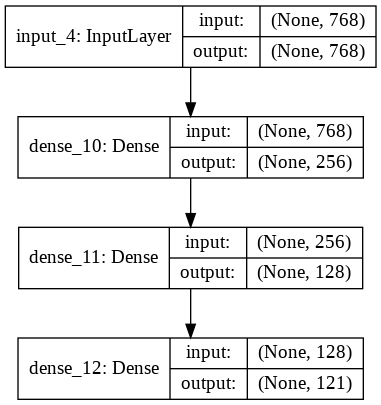

In [ ]:
plot_model(model, to_file='model_tags.png', show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               196864    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 121)               15609     
Total params: 245,369
Trainable params: 245,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.load_weights('./tag_prediction_model_weights.h5')

In [ ]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./logs', write_graph=True, write_images=True)
early_stopping = EarlyStopping(monitor='val_loss')
history = model.fit(x = x_train, y = tensor_train_cat,
                    batch_size=100,
                    epochs=100,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 72000 samples, validate on 8000 samples
Epoch 1/100
  200/72000 [..............................] - ETA: 4:07 - loss: 11.6148 - accuracy: 0.2600 - precision: 0.0314 - recall: 0.5629 - f1: 0.0596

/tensorflow-1.15.2/python3.7/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.342866). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


 3000/72000 [>.............................] - ETA: 38s - loss: 11.5704 - accuracy: 0.2217 - precision: 0.0307 - recall: 0.5422 - f1: 0.0580

/tensorflow-1.15.2/python3.7/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.587280). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/tensorflow-1.15.2/python3.7/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.172289). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


72000/72000 [==============================] - 6s 78us/step - loss: 10.9900 - accuracy: 0.2325 - precision: 0.0357 - recall: 0.5627 - f1: 0.0670 - val_loss: 10.8629 - val_accuracy: 0.2339 - val_precision: 0.0369 - val_recall: 0.5714 - val_f1: 0.0692
Epoch 2/100
72000/72000 [==============================] - 4s 59us/step - loss: 10.9067 - accuracy: 0.2326 - precision: 0.0363 - recall: 0.5660 - f1: 0.0683 - val_loss: 10.8713 - val_accuracy: 0.2351 - val_precision: 0.0390 - val_recall: 0.5695 - val_f1: 0.0730


In [ ]:
model.predict(x=x_train[13:14])[0]

array([   0.      ,  306.22992 ,  594.7467  ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      , 1236.2375  ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
        197.08475 ,    0.      ,  863.7605  ,    0.      , 1312.0048  ,
          0.      ,    0.      ,  309.6776  ,    0.      ,    0.      ,
          0.      ,    0.      ,  122.934364,    0.      ,    0.      ,
          0.      ,  142.85136 ,  178.64944 ,    0.      ,  502.35547 ,
          0.      ,    0.      ,   87.78244 ,    0.      ,  625.45905 ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,    0.      ,    0.      ,  100.01656 ,    0.      ,
          0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
          0.      ,  140.2018  ,    0.      ,    0.      ,    0.      ,
        192.69585 ,    0.      ,    0.      ,   99.09492 ,    0.

**Тест на вводимом тексте**

In [ ]:
likes_for_train = np.asarray(data_train['number_of_likes'])
likes_for_val = np.asarray(data_val['number_of_likes'])
likes_for_train.shape

(80000,)

**Предсказание по тэгу и тексту лайков**

In [ ]:
model_with_likes = keras.models.Sequential()
#l_title = L.Input(shape=[None], name="Title")
l_twitt = L.Input(batch_shape=(None, 768))
l_categ = L.Input(batch_shape = (None, 121))
l_categor = L.Dense(input_shape = (121,1), activation='relu', units =1)(l_categ)
l_twitt_emb1 = L.Dense(input_shape = (768,1), activation='relu', units = 256)(l_twitt)
l_twitt_emb2 = L.Dense(input_shape = (256,1), activation='relu', units = 128)(l_twitt_emb1)
l_twitt_emb3 = L.Dense(input_shape=(128,1), activation='relu', units = 121)(l_twitt_emb2)
l_all = L.Concatenate()([l_twitt_emb3, l_categor])
output_layer1 = L.Dense(input_shape=(121*2,1),activation='relu', units=128)(l_all)
output_layer2 = L.Dense(input_shape = (128,1),activation='relu', units=1)(output_layer1)
model_with_likes = keras.models.Model(inputs=[l_twitt, l_categ], outputs=[output_layer2])
model_with_likes.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
model_with_likes.load_weights('./tag_prediction_model_with_likes_weights.h5')

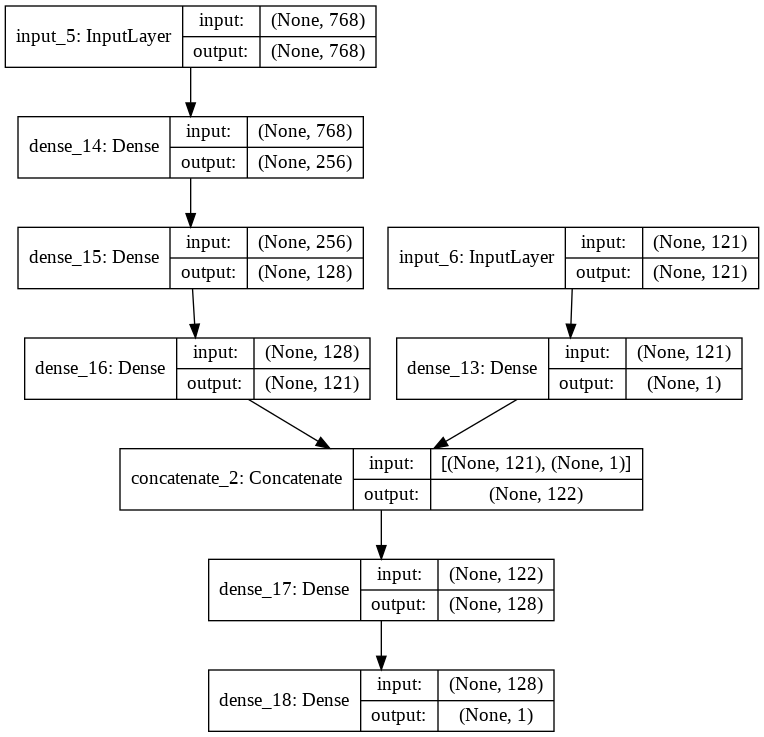

In [ ]:
plot_model(model_with_likes, to_file='model_likes.png', show_shapes=True)

In [ ]:
model_with_likes.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 768)          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 256)          196864      input_5[0][0]                    
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 128)          32896       dense_14[0][0]                   
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 121)          0                                            
____________________________________________________________________________________________

In [ ]:
his_of_model_with_likes = model_with_likes.fit(x = [x_train,tensor_train_cat], y = likes_for_train,
                    batch_size=100,
                    epochs=100,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])

Train on 72000 samples, validate on 8000 samples
Epoch 1/100
72000/72000 [==============================] - 4s 54us/step - loss: 0.1473 - accuracy: 0.7249 - val_loss: 0.1485 - val_accuracy: 0.7278
Epoch 2/100
72000/72000 [==============================] - 4s 50us/step - loss: 0.1473 - accuracy: 0.7249 - val_loss: 0.1485 - val_accuracy: 0.7278


In [ ]:
print("Shit hasnt failed")

Shit hasnt failed


In [ ]:
from keras.models import save_model, load_model

'''model.save('./tag_prediction_model.h5')
model_with_likes.save('./tag_prediction_model_with_likes.h5')'''

"model.save('./tag_prediction_model.h5')\nmodel_with_likes.save('./tag_prediction_model_with_likes.h5')"

In [ ]:
def training_of_model (data: pd.DataFrame, model, model_with_likes, mdb, bertClient, tensorboard, early_stopping):
  data = data.sample(frac=1)
  data = data.reset_index(drop=True)
  data['encoded_tweets'] = bert_tweet_encofing(bertClient, data['content'])
  data['categorical'] = cat_transform(data['clusters'], mdb)
  data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
  tensor_train_cat = tensor_cat_trandform(data_train['categorical'])
  tensor_val_cat = tensor_cat_trandform(data_val['categorical'])
  x_train = data_train['encoded_tweets'].to_numpy()
  x_val= data_val['encoded_tweets'].to_numpy()
  x_train = np.stack(x_train)
  x_val = np.stack(x_val)
  history = model.fit(x = x_train, y = tensor_train_cat,
                    batch_size=100,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])
  likes_for_train = np.asarray(data_train['number_of_likes'])
  likes_for_val = np.asarray(data_val['number_of_likes'])
  his_of_model_with_likes = model_with_likes.fit(x = [x_train,tensor_train_cat], y =likes_for_train,
                    batch_size=100,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[tensorboard, early_stopping])
  return model, model_with_likes

In [ ]:
#model = load_model('./tag_prediction_model.h5')
for i in range (2,37):
  model, model_with_likes = training_of_model(data1[(100000*(i-1)):(100000*i)],model, model_with_likes, mdb, bertClient, tensorboard, early_stopping)
  model.save('./tag_prediction_model.h5')
  model.save_weights('./tag_prediction_model_weights.h5')
  model_with_likes.save('./tag_prediction_model_with_likes.h5')
  model_with_likes.save_weights('./tag_prediction_model_with_likes_weights.h5')
  print(i)  

Train on 72000 samples, validate on 8000 samples
Epoch 1/50
72000/72000 [==============================] - 4s 50us/step - loss: 10.9729 - accuracy: 0.2340 - precision: 0.0358 - recall: 0.5634 - f1: 0.0673 - val_loss: 11.0494 - val_accuracy: 0.2305 - val_precision: 0.0379 - val_recall: 0.5605 - val_f1: 0.0710
Epoch 2/50
72000/72000 [==============================] - 4s 50us/step - loss: 11.0017 - accuracy: 0.2322 - precision: 0.0339 - recall: 0.5645 - f1: 0.0639 - val_loss: 11.0776 - val_accuracy: 0.2305 - val_precision: 0.0320 - val_recall: 0.5649 - val_f1: 0.0606
Train on 72000 samples, validate on 8000 samples
Epoch 1/50
72000/72000 [==============================] - 4s 50us/step - loss: 0.1483 - accuracy: 0.7217 - val_loss: 0.1428 - val_accuracy: 0.7320
Epoch 2/50
72000/72000 [==============================] - 4s 50us/step - loss: 0.1483 - accuracy: 0.7217 - val_loss: 0.1428 - val_accuracy: 0.7320
2
Train on 72000 samples, validate on 8000 samples
Epoch 1/50
72000/72000 [===========

KeyboardInterrupt: ignored

In [ ]:
model.save('./tag_prediction_model.h5')
model.save_weights('./tag_prediction_model_weights.h5')
model_with_likes.save('./tag_prediction_model_with_likes.h5')
model_with_likes.save_weights('./tag_prediction_model_with_likes_weights.h5')

In [ ]:
import pickle
with open('company_data.pkl', 'wb') as outp:
    pickle.dump(mdb, outp, pickle.HIGHEST_PROTOCOL)

In [ ]:
score1 = model_with_likes.evaluate(x = [x_val, tensor_val_cat], y = likes_for_val, batch_size=100, verbose=1)
print('\n')
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

20000/20000 [==============================] - 0s 18us/step


Test loss: 0.15059731710702182
Test accuracy: 0.7215499877929688


In [ ]:
score = model.evaluate(x_val, tensor_val_cat, batch_size=30, verbose=1)
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

20000/20000 [==============================] - 1s 68us/step


Test loss: 10.938786545276642
Test accuracy: 0.23659999668598175


In [ ]:
text_processor = TextPreProcessor(
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    annotate={"hashtag",# "allcaps", 
              "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    segmenter="twitter", 
    corrector="twitter", 
    #unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    dicts=[emoticons]
  )

In [ ]:
def model_prediction(s, model, bertClient, mdb, model_with_likes):
  #s = text_processor.pre_process_doc(s)
  s = bertClient.encode([s])
  pr = model.predict(s)
  pr = pr[0]
  ind = np.argpartition(pr, -30)[-30:]
  pred = np.zeros(len(pr))
  for i in range(0, len(pred)):
    if i in ind:
      pred[i]=1
  x = np.concatenate(([pred],[np.zeros(len(pred))]), axis = 0)
  list_of_corresponding_tags =  mdb.inverse_transform(x)
  list_of_corresponding_tags = list(list_of_corresponding_tags[0])
  list_of_corresponding_tags = [(np.dot(pr, mdb.transform([[tag]])[0]),
                                             model_with_likes.predict([[s[0]],[mdb.transform([[tag]])[0]]])[0][0], tag) for tag in list_of_corresponding_tags]
  return sorted(list_of_corresponding_tags, reverse=True)

In [ ]:
s = 'Computer programming is the process of designing and building an executable computer program to accomplish a specific computing result or to perform a particular task. Programming involves tasks such as analysis, generating algorithms, profiling algorithms accuracy and resource consumption, and the implementation of algorithms in a chosen programming language (commonly referred to as coding).[1][2] The source code of a program is written in one or more languages that are intelligible to programmers, rather than machine code, which is directly executed by the central processing unit. The purpose of programming is to find a sequence of instructions that will automate the perform'
res = model_prediction(s, model, bertClient, mdb, model_with_likes=model_with_likes)

In [ ]:
res

[(36819.76171875, 0.0, 96),
 (4247.599609375, 0.0, 39),
 (2069.77001953125, 0.0, 42),
 (2021.305419921875, 0.0, 33),
 (1440.4124755859375, 0.0, 37),
 (1267.5997314453125, 0.0, 38),
 (1223.4490966796875, 0.0, 75),
 (1046.6192626953125, 0.0, 20),
 (1000.9122924804688, 0.0, 78),
 (726.1573486328125, 0.0, 80),
 (650.2639770507812, 0.0, 24),
 (549.7344970703125, 0.0, 68),
 (403.0625, 0.0, 74),
 (0.0, 0.0, 120),
 (0.0, 0.0, 55),
 (0.0, 0.0, 54),
 (0.0, 0.0, 53),
 (0.0, 0.0, 52),
 (0.0, 0.0, 50),
 (0.0, 0.0, 49),
 (0.0, 0.0, 48),
 (0.0, 0.0, 47),
 (0.0, 0.0, 46),
 (0.0, 0.0, 45),
 (0.0, 0.0, 44),
 (0.0, 0.0, 43),
 (0.0, 0.0, 41),
 (0.0, 0.0, 40),
 (0.0, 0.0, 36),
 (0.0, 0.0, 35)]

In [ ]:
to_predict = []
for a, b, c in res:
    to_predict.append(dict_of_vectors.loc[dict_of_vectors['clusters']==c, 'words'])

In [ ]:
to_predict[0].iloc[0]

'#elsalvador'

In [ ]:
true_data = []
for i in to_predict:
  for j in range(0, len(i)):
    true_data.append(i.iloc[j])
true_data

['#elsalvador',
 '#pca',
 '#nomasks',
 '#play',
 '#thisisus',
 '#dancingwiththedevil',
 '#legal',
 '#worldhunger',
 '#newzroom405',
 '#results',
 '#pacs',
 '#blackhistorymonth',
 '#islamabad',
 '#capitalism',
 '#constructionjobs',
 '#malikvswankhedes',
 '#teamseas',
 '#localrock',
 '#jeffbezos',
 '#kamalhaasan',
 '#sunday',
 '#portland',
 '#engineeringjobs',
 '#educationjobs',
 '#euro',
 '#createatignite',
 '#csr',
 '#soultalk',
 '#liquoroseinsa',
 '#dofo',
 '#usaid',
 '#xspoilers',
 '#holidayspirit',
 '#savedemocracy',
 '#fairbargainingnow',
 '#umassworksbecausewedo',
 '#goodnighteveryone',
 '#policingpromise',
 '#girls',
 '#whereispengshuai',
 '#registerdemocrats',
 '#voterizer',
 '#arisaka',
 '#bbcf',
 '#foodbill',
 '#mtpol',
 '#cryptoavengers',
 '#atromg8',
 '#panafricanismprevails',
 '#justicematters',
 '#liberalismisamentaldisorder',
 '#magic',
 '#opengov',
 '#taxcodeisracist',
 '#ccprfsummit2021',
 '#pesticides',
 '#dave',
 '#forza',
 '#aot',
 '#veteran',
 '#fbr',
 '#yegwx',
 '#

In [ ]:
from UnofficialTwitterApi import *
gleb = cl.GetTopicsScore(topics=true_data[:1000])
to_sort = []
for key, value in gleb.items():
    to_sort.append((value, key))
to_sort = sorted(to_sort, key=lambda x: x[0], reverse=True)

In [ ]:
to_sort

[(139396, '#is'),
 (132273, '#no'),
 (122065, '#play'),
 (106068, '#cbs'),
 (102745, '#this'),
 (101199, '#12days'),
 (92763, '#a'),
 (89282, '#black'),
 (89193, '#mellos'),
 (86335, '#shiva'),
 (85693, '#cap'),
 (84705, '#bc'),
 (84218, '#islamabad'),
 (83738, '#wizkid'),
 (82900, '#bri'),
 (82453, '#larain'),
 (81884, '#girls'),
 (81884, '#girlstalkza'),
 (80206, '#r'),
 (79016, '#bids'),
 (75697, '#holochain'),
 (75138, '#supreme'),
 (74331, '#abc'),
 (74115, '#pens'),
 (70546, '#방탄소년단지민'),
 (70546, '#방탄소년단지'),
 (70236, '#wwesupercard'),
 (69749, '#sadakatsiz'),
 (69622, '#tokyo'),
 (69502, '#timepoy'),
 (69334, '#massage_in_riyadh'),
 (67541, '#yegwx'),
 (66997, '#got'),
 (66395, '#oxfordhighschool'),
 (66240, '#eua'),
 (64988, '#xspoilers'),
 (63884, '#ideas'),
 (62910, '#thanks'),
 (62588, '#welldone'),
 (62113, '#theta'),
 (61651, '#stl'),
 (61568, '#jojo_anime'),
 (61463, '#bestoftweets'),
 (61067, '#ba'),
 (59994, '#population'),
 (59688, '#summerwells'),
 (59515, '#spam'),
 (

In [ ]:
dict_of_vectors.loc[dict_of_vectors['clusters']==90, 'words']

3                           #ai
122                    #finance
127                 #innovation
128             #sustainability
200      #digitaltransformation
201                    #digital
212                         #ml
247                 #technology
275                   #business
276                    #startup
536                       #data
569     #artificialintelligence
590            #machinelearning
591               #deeplearning
702                       #tech
801                      #cloud
852                 #automation
907                   #mobility
992                    #fintech
1012              #entrepreneur
1013             #smallbusiness
1136               #supplychain
1190                   #bigdata
1199                 #ecommerce
1241                       #iot
1242                        #5g
1248                 #logistics
1254               #datascience
1365                  #startups
1483                 #analytics
1734                       #esg
1795    

In [ ]:
(dict_of_vectors.loc[dict_of_vectors['words']=='#ai', 'clusters'])

3    90
Name: clusters, dtype: int64

In [ ]:
model_with_likes.get_weights()

In [ ]:
model_with_likes.predict([x_train[3:4],tensor_train_cat[2:3]])

In [ ]:
with open('cluster_data.pkl', 'wb') as outp:
    pickle.dump(dict_of_vectors, outp, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('company_data.pkl', 'wb') as outp:
    pickle.dump(mdb, outp, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('agl.pkl', 'wb') as outp:
    pickle.dump(kmeans, outp, pickle.HIGHEST_PROTOCOL)

In [ ]:
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive"
%cd /content/gdrive/My Drive/Kaggle
%cd /content/gdrive/My Drive/Models_alpha_version

In [ ]:
model_with_likes.load_weights('./tag_prediction_model_with_likes_weights.h5')
model.load_weights('./tag_prediction_model_weights.h5')

In [ ]:
with open('cluster_data.pkl', 'rb') as f:
    dict_of_vectors = pickle.load(f)
with open('company_data.pkl', 'rb') as k:
    mdb = pickle.load(k)

In [ ]:
dict_of_vectors.head()